In [76]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time

import scipy.special as sc
from scipy.interpolate import interp1d
from astropy import units as u
from skyfield.api import load
import pymc as pm
import arviz as az
import xarray as xr
import scipy
import aesara
import aesara.tensor as at
from aesara.compile.ops import as_op

az.style.use("arviz-darkgrid")

In [74]:
def diffract(t, t0, A, v):
    cc, ss = scipy.special.fresnel(v*(t-t0))
    y = A*0.5*((cc + 0.5)**2 + (ss + 0.5)**2)
    # print("cc=", type(cc))
    return y

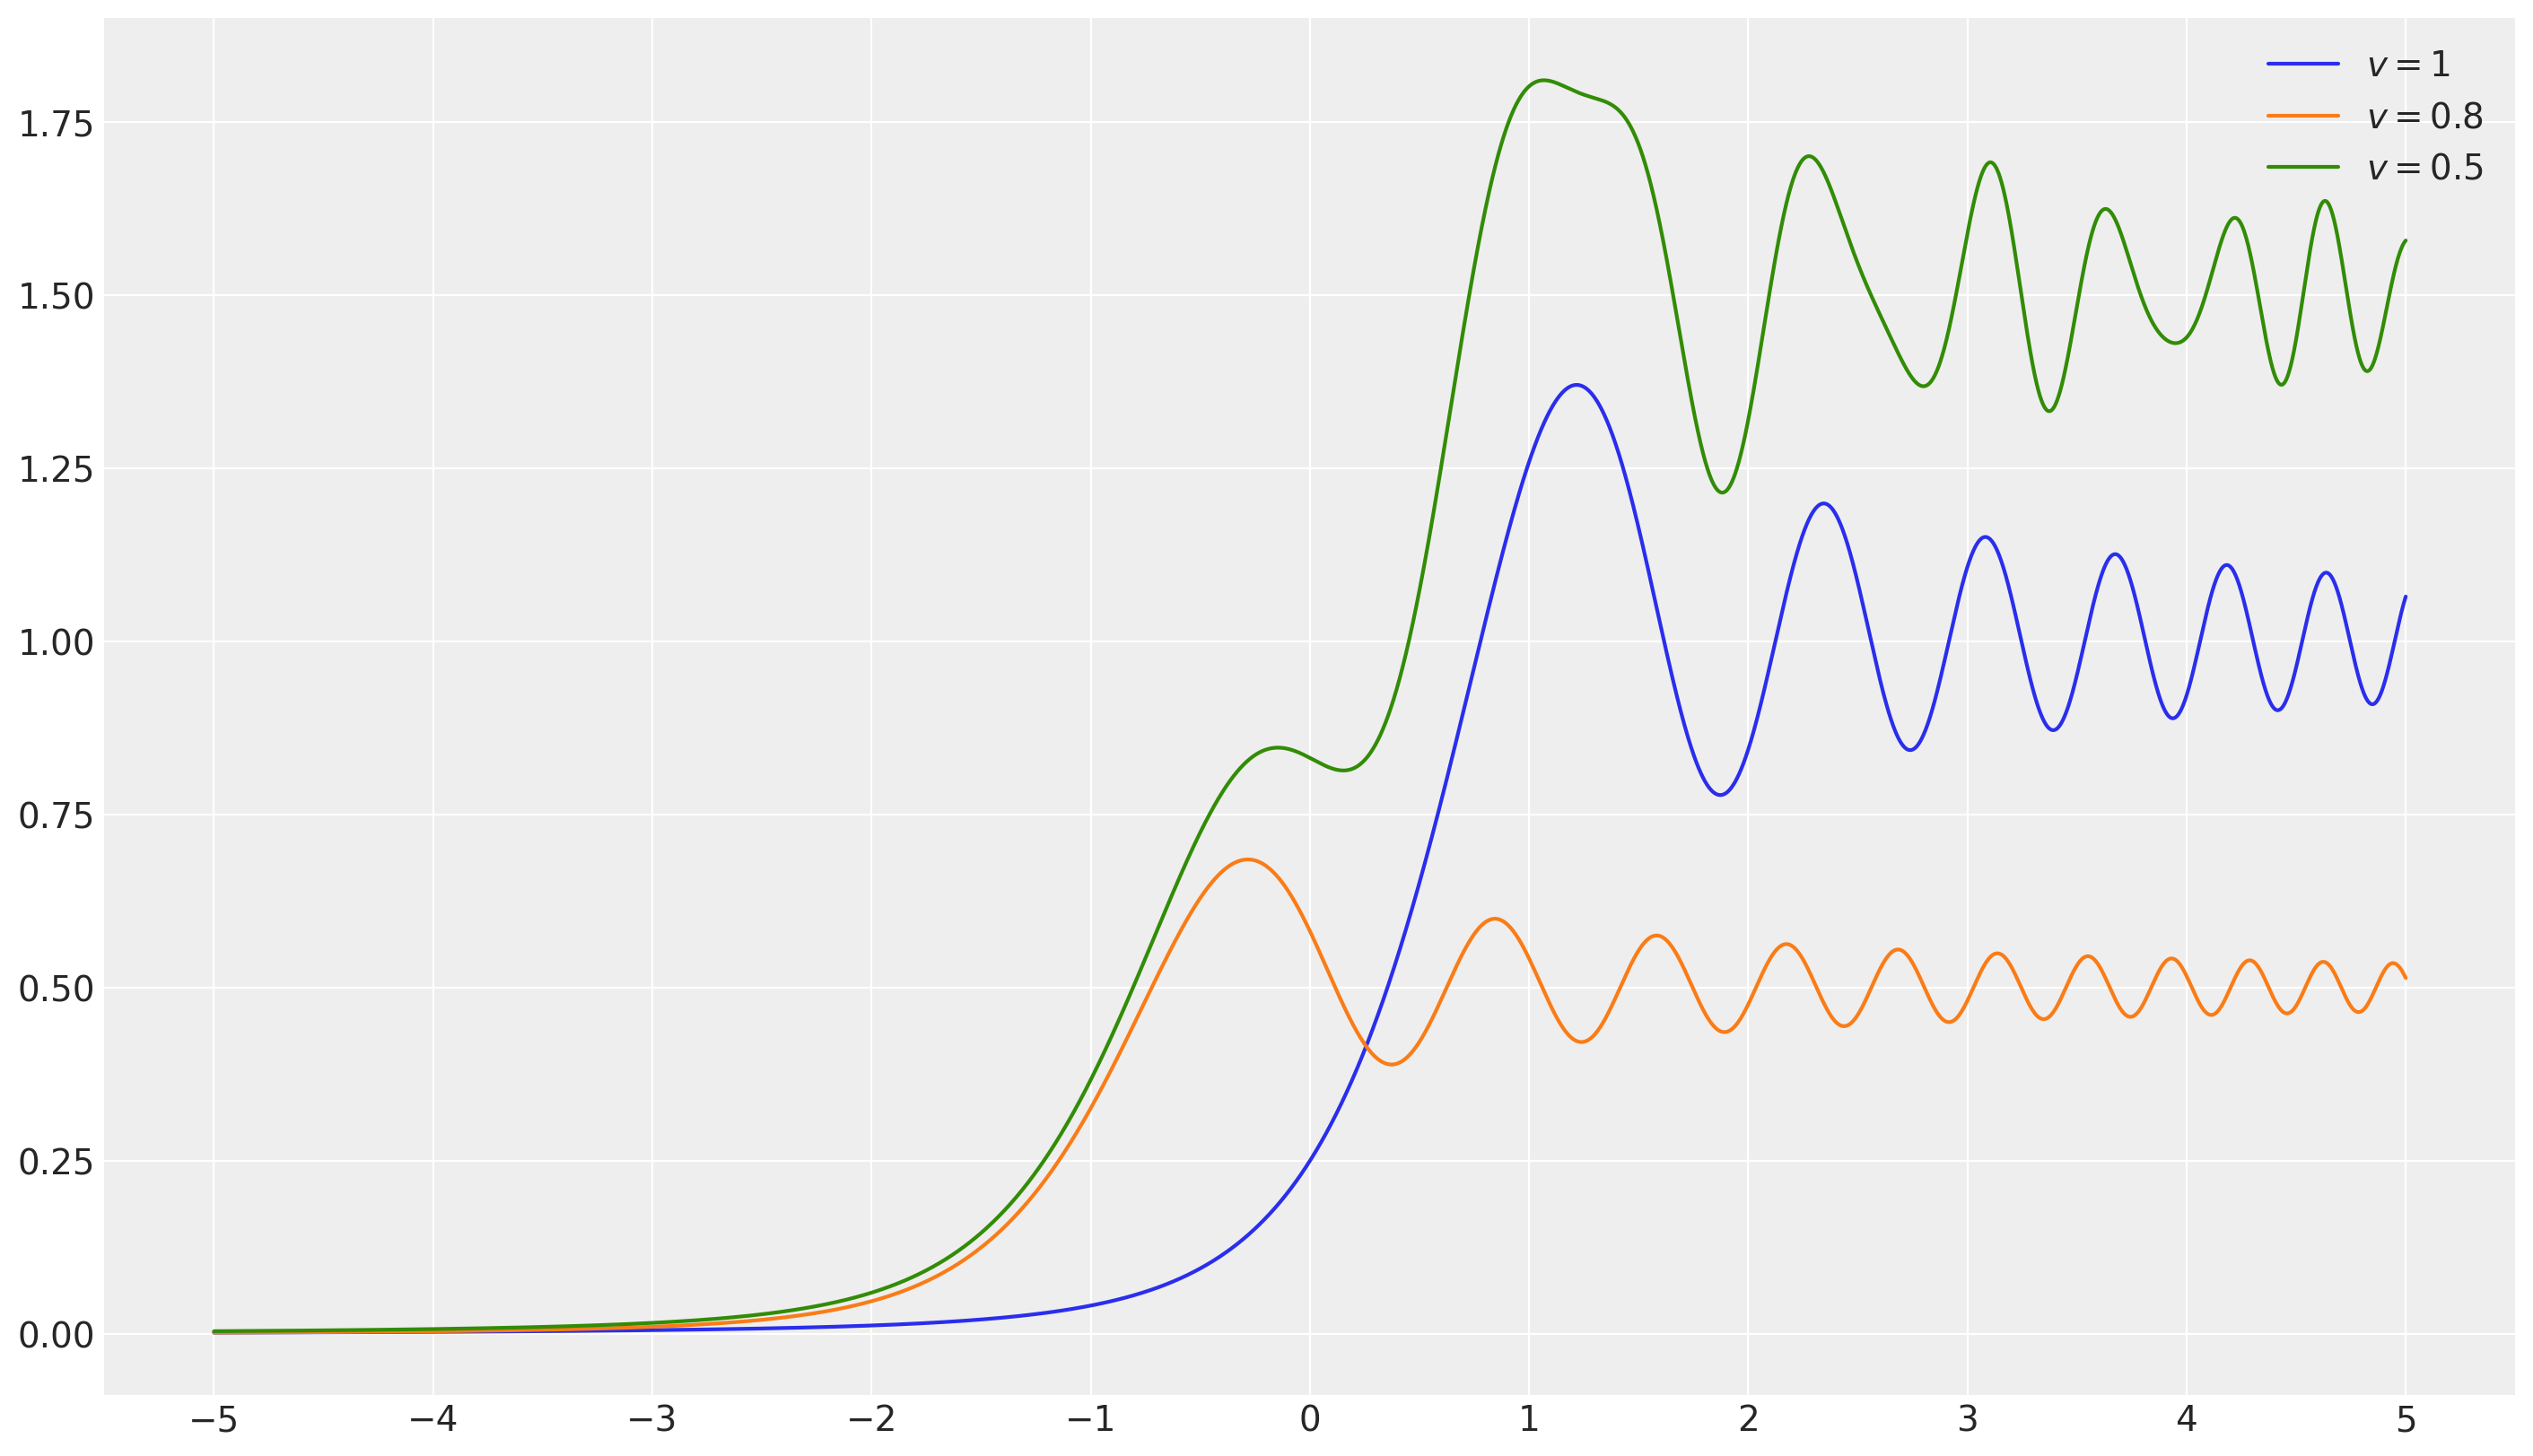

In [92]:
plt.figure(figsize = (14,8), facecolor='w')
nu = np.linspace(-5,5,10000)

A1 = 1
# A2 = 

flux1 = diffract(nu, 0, 1, 1)
flux2 = diffract(nu, -1.5, 0.5, 1)

ydata = flux1 + flux2
plt.plot(nu, flux1)
plt.plot(nu, flux2)

plt.plot(nu, ydata)

plt.legend(['$v = 1$','$v = 0.8$', '$v = 0.5$', '$v = 0.2$'])
plt.xticks(np.arange(-5,6));